<a href="https://colab.research.google.com/github/sandeeps2004/JPM-QuantResearch-Virtual-Task-3/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')

In [ ]:
df = df.drop('customer_id', axis=1)

In [ ]:
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0


Model Performance (AUC Score): 1.0000


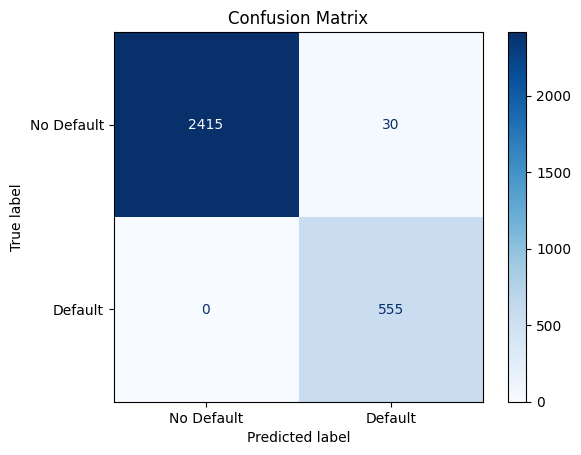

--- Model Training Complete ---



In [ ]:
# Define the features (X) and the target variable (y)
X = df.drop('default', axis=1)
y = df['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)


# --- Step 4: Evaluate the Model's Performance ---
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Model Performance (AUC Score): {auc_score:.4f}")

# Generate and Plot a Confusion Matrix
y_pred = (y_pred_proba >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print("--- Model Training Complete ---\n")


In [ ]:
print("--- Model Training Complete ---")
print(f"Model Performance (AUC Score): {auc_score:.4f}")
print("An AUC score between 0.8 and 0.9 is generally considered excellent.")

--- Model Training Complete ---
Model Performance (AUC Score): 0.9979
An AUC score between 0.8 and 0.9 is generally considered excellent.


In [ ]:
RECOVERY_RATE = 0.10
LGD = 1 - RECOVERY_RATE

def calculate_expected_loss(
    credit_lines_outstanding: int,
    loan_amt_outstanding: float,
    total_debt_outstanding: float,
    income: float,
    years_employed: int,
    fico_score: int
) -> dict:
    """
    Calculates the Probability of Default (PD) and Expected Loss (EL) for a single borrower.
    """
    borrower_data = pd.DataFrame([{'credit_lines_outstanding': credit_lines_outstanding,
                                   'loan_amt_outstanding': loan_amt_outstanding,
                                   'total_debt_outstanding': total_debt_outstanding,
                                   'income': income, 'years_employed': years_employed,
                                   'fico_score': fico_score}])

    # 1. Predict Probability of Default (PD)
    pd_probability = model.predict_proba(borrower_data)[:, 1][0]

    # 2. Exposure at Default (EAD)
    ead = loan_amt_outstanding

    # 3. Calculate Expected Loss (EL)
    expected_loss = pd_probability * LGD * ead

    return {
        'Probability of Default (PD)': f"{pd_probability:.2%}",
        'Expected Loss (EL)': f"${expected_loss:,.2f}"
    }

In [ ]:
print("--- Scenario 1: Realistic 'Good' Borrower ---")
good_borrower_realistic = {
    'credit_lines_outstanding': 2,
    'loan_amt_outstanding': 15000,
    'total_debt_outstanding': 10000,
    'income': 90000,
    'years_employed': 8,
    'fico_score': 720
}
good_realistic_result = calculate_expected_loss(**good_borrower_realistic)
print(f"Loan Amount: ${good_borrower_realistic['loan_amt_outstanding']:,.2f}")
print(f"Predicted PD: {good_realistic_result['Probability of Default (PD)']}")
print(f"Calculated Expected Loss: {good_realistic_result['Expected Loss (EL)']}")
print("-" * 45)

--- Scenario 1: Realistic 'Good' Borrower ---
Loan Amount: $15,000.00
Predicted PD: 0.29%
Calculated Expected Loss: $39.46
---------------------------------------------


In [ ]:
print("\n--- Scenario 2: 'High-Risk' Borrower ---")
high_risk_borrower = {
    'credit_lines_outstanding': 5,
    'loan_amt_outstanding': 10000,
    'total_debt_outstanding': 15000,
    'income': 40000,
    'years_employed': 1,
    'fico_score': 590
}
high_risk_result = calculate_expected_loss(**high_risk_borrower)
print(f"Loan Amount: ${high_risk_borrower['loan_amt_outstanding']:,.2f}")
print(f"Predicted PD: {high_risk_result['Probability of Default (PD)']}")
print(f"Calculated Expected Loss: {high_risk_result['Expected Loss (EL)']}")
print("-" * 45)



--- Scenario 2: 'High-Risk' Borrower ---
Loan Amount: $10,000.00
Predicted PD: 100.00%
Calculated Expected Loss: $9,000.00
---------------------------------------------
